In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/Training.zip

Streaming output truncated to the last 5000 lines.
  inflating: Training/No_Fire/lake_resized_lake_frame1670.jpg  
  inflating: Training/No_Fire/lake_resized_lake_frame1674.jpg  
  inflating: Training/No_Fire/lake_resized_lake_frame1675.jpg  
  inflating: Training/No_Fire/lake_resized_lake_frame1695.jpg  
  inflating: Training/No_Fire/lake_resized_lake_frame1718.jpg  
  inflating: Training/No_Fire/lake_resized_lake_frame1734.jpg  
  inflating: Training/No_Fire/lake_resized_lake_frame1753.jpg  
  inflating: Training/No_Fire/lake_resized_lake_frame1788.jpg  
  inflating: Training/No_Fire/lake_resized_lake_frame1793.jpg  
  inflating: Training/No_Fire/lake_resized_lake_frame1799.jpg  
  inflating: Training/No_Fire/lake_resized_lake_frame1802.jpg  
  inflating: Training/No_Fire/lake_resized_lake_frame1811.jpg  
  inflating: Training/No_Fire/lake_resized_lake_frame1817.jpg  
  inflating: Training/No_Fire/lake_resized_lake_frame1829.jpg  
  inflating: Training/No_Fire/lake_resized_lake_frame

In [ ]:
!unzip /content/drive/MyDrive/Test.zip

Streaming output truncated to the last 5000 lines.
  inflating: Test/Fire/resized_test_fire_frame3884.jpg  
  inflating: Test/Fire/resized_test_fire_frame3888.jpg  
  inflating: Test/Fire/resized_test_fire_frame3889.jpg  
  inflating: Test/Fire/resized_test_fire_frame3895.jpg  
  inflating: Test/Fire/resized_test_fire_frame3896.jpg  
  inflating: Test/Fire/resized_test_fire_frame39.jpg  
  inflating: Test/Fire/resized_test_fire_frame3917.jpg  
  inflating: Test/Fire/resized_test_fire_frame3920.jpg  
  inflating: Test/Fire/resized_test_fire_frame3939.jpg  
  inflating: Test/Fire/resized_test_fire_frame3943.jpg  
  inflating: Test/Fire/resized_test_fire_frame395.jpg  
  inflating: Test/Fire/resized_test_fire_frame3953.jpg  
  inflating: Test/Fire/resized_test_fire_frame3954.jpg  
  inflating: Test/Fire/resized_test_fire_frame3958.jpg  
  inflating: Test/Fire/resized_test_fire_frame3959.jpg  
  inflating: Test/Fire/resized_test_fire_frame396.jpg  
  inflating: Test/Fire/resized_test_fire_

In [ ]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms, datasets

In [ ]:
from torchvision import transforms, datasets
train_dataset = datasets.ImageFolder(root='/content/Training')
val_dataset = datasets.ImageFolder(root='/content/Test')

In [ ]:
train_dataset

Dataset ImageFolder
    Number of datapoints: 39375
    Root location: /content/Training

In [ ]:
val_dataset

Dataset ImageFolder
    Number of datapoints: 8617
    Root location: /content/Test

In [ ]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms, datasets

# Check if CUDA is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

# Define the transform to normalize the data
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the Flame dataset using PyTorch's ImageFolder class
train_dataset = datasets.ImageFolder(root='/content/Training', transform=transform)
val_dataset = datasets.ImageFolder(root='/content/Test', transform=transform)

# Define the data loaders for training and validation sets
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Define the CNN model
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 28 * 28, 512)
        self.fc2 = nn.Linear(512, 2)
    
    def forward(self, x):
        x = self.pool1(torch.relu(self.conv1(x)))
        x = self.pool2(torch.relu(self.conv2(x)))
        x = self.pool3(torch.relu(self.conv3(x)))
        x = x.view(-1, 64 * 28 * 28)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x



# Initialize the model and move it to the device
modelCNN = CNNModel().to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(modelCNN.parameters(), lr=0.001)

# Train the model
num_epochs = 20
for epoch in range(num_epochs):
    # Set the model to training mode
    modelCNN.train()
    
    # Loop over the training data
    for i, (images, labels) in enumerate(train_loader):
        # Move the data to the device
        images = images.to(device)
        labels = labels.to(device)
        
        # Zero the gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = modelCNN(images)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
    # Set the model to evaluation mode
    modelCNN.eval()
    
    # Compute the accuracy on the validation data
    correct = 0
    total = 0
    true_labels = []
    predicted_labels = []
    with torch.no_grad():
        for images, labels in val_loader:
            # Move the data to the device
            images = images.to(device)
            labels = labels.to(device)
            
            outputs = modelCNN(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            # Append to the lists
            true_labels += labels.cpu().numpy().tolist()
            predicted_labels += predicted.cpu().numpy().tolist()
  # Print the loss and accuracy for this epoch
    print('Epoch [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}'.format(epoch + 1, num_epochs, loss.item(), 100 * correct / total))

Using device: cuda
Epoch [1/20], Loss: 0.0003, Accuracy: 51.90
Epoch [2/20], Loss: 0.0001, Accuracy: 54.20
Epoch [3/20], Loss: 0.0233, Accuracy: 54.25
Epoch [4/20], Loss: 0.0000, Accuracy: 51.05
Epoch [5/20], Loss: 0.0000, Accuracy: 53.50
Epoch [6/20], Loss: 0.0000, Accuracy: 54.62
Epoch [7/20], Loss: 0.0000, Accuracy: 53.82
Epoch [8/20], Loss: 0.0000, Accuracy: 57.83
Epoch [9/20], Loss: 0.0000, Accuracy: 56.48
Epoch [10/20], Loss: 0.0000, Accuracy: 55.65
Epoch [11/20], Loss: 0.0000, Accuracy: 50.90
Epoch [12/20], Loss: 0.0000, Accuracy: 56.79
Epoch [13/20], Loss: 0.0000, Accuracy: 55.37
Epoch [14/20], Loss: 0.0000, Accuracy: 56.38
Epoch [15/20], Loss: 0.0000, Accuracy: 55.65
Epoch [16/20], Loss: 0.0001, Accuracy: 46.84
Epoch [17/20], Loss: 0.0000, Accuracy: 55.41
Epoch [18/20], Loss: 0.0000, Accuracy: 58.31
Epoch [19/20], Loss: 0.0000, Accuracy: 58.22
Epoch [20/20], Loss: 0.0000, Accuracy: 59.02


In [ ]:
from torchsummary import summary
# Create an instance of the model

modelCNN = CNNModel().to(device)
# Print the summary of the model
summary(modelCNN, input_size=(3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 16, 224, 224]             448
         MaxPool2d-2         [-1, 16, 112, 112]               0
            Conv2d-3         [-1, 32, 112, 112]           4,640
         MaxPool2d-4           [-1, 32, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          18,496
         MaxPool2d-6           [-1, 64, 28, 28]               0
            Linear-7                  [-1, 512]      25,690,624
            Linear-8                    [-1, 2]           1,026
Total params: 25,715,234
Trainable params: 25,715,234
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.57
Forward/backward pass size (MB): 13.40
Params size (MB): 98.10
Estimated Total Size (MB): 112.07
----------------------------------------------------------------


In [ ]:
from sklearn.metrics import classification_report

# define your class labels
class_names = ['Fire', 'No-Fire']

# generate classification report
report = classification_report(true_labels, predicted_labels, target_names=class_names)

print(report)

              precision    recall  f1-score   support

        Fire       0.62      0.79      0.70      5137
     No-Fire       0.49      0.30      0.37      3480

    accuracy                           0.59      8617
   macro avg       0.56      0.54      0.53      8617
weighted avg       0.57      0.59      0.56      8617



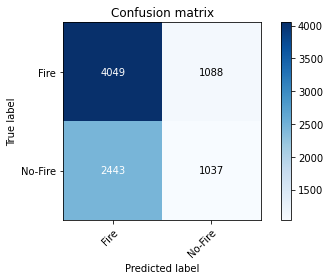

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np


# define your class labels
class_names = ['Fire', 'No-Fire']

# create confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# plot confusion matrix with labels
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=class_names, yticklabels=class_names,
       title='Confusion matrix',
       ylabel='True label',
       xlabel='Predicted label')

# rotate x-axis labels
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# add text labels to each cell
fmt = 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

fig.tight_layout()
plt.show()

In [ ]:
torch.save(modelCNN.state_dict(), 'fire_detection_model.pth')

In [ ]:
from torchvision import models, transforms, datasets
# Load pre-trained model
model = models.resnet50(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)  # replace last layer

# Freeze all layers except the last one
for param in model.parameters():
    param.requires_grad = False
for param in model.fc.parameters():
    param.requires_grad = True

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)

# Train the model
model.to(device)
num_epochs = 20
for epoch in range(num_epochs):
    # Train the model
    model.train()
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    epoch_loss = running_loss / len(train_loader)

    # Evaluate the model
    model.eval()
    num_correct = 0
    num_total = 0
    true_labels = []
    predicted_labels = []
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            num_total += labels.size(0)
            num_correct += (predicted == labels).sum().item()
            # Append to the lists
            true_labels += labels.cpu().numpy().tolist()
            predicted_labels += predicted.cpu().numpy().tolist()
    val_acc = 100.0 * num_correct / num_total

    # Print epoch statistics
    print(f"Epoch [{epoch+1}/{num_epochs}], "
          f"Train Loss: {epoch_loss:.4f}, "
          f"Val Acc: {val_acc:.2f}%")

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

Epoch [1/20], Train Loss: 0.0702, Val Acc: 61.13%
Epoch [2/20], Train Loss: 0.0369, Val Acc: 65.10%
Epoch [3/20], Train Loss: 0.0312, Val Acc: 65.34%
Epoch [4/20], Train Loss: 0.0267, Val Acc: 67.63%
Epoch [5/20], Train Loss: 0.0232, Val Acc: 66.00%
Epoch [6/20], Train Loss: 0.0258, Val Acc: 66.69%
Epoch [7/20], Train Loss: 0.0214, Val Acc: 64.99%
Epoch [8/20], Train Loss: 0.0197, Val Acc: 64.38%
Epoch [9/20], Train Loss: 0.0164, Val Acc: 66.53%
Epoch [10/20], Train Loss: 0.0180, Val Acc: 62.53%
Epoch [11/20], Train Loss: 0.0177, Val Acc: 65.59%
Epoch [12/20], Train Loss: 0.0159, Val Acc: 65.75%
Epoch [13/20], Train Loss: 0.0138, Val Acc: 66.97%
Epoch [14/20], Train Loss: 0.0152, Val Acc: 67.07%
Epoch [15/20], Train Loss: 0.0143, Val Acc: 65.30%
Epoch [16/20], Train Loss: 0.0123, Val Acc: 63.76%
Epoch [17/20], Train Loss: 0.0122, Val Acc: 67.11%
Epoch [18/20], Train Loss: 0.0146, Val Acc: 64.52%
Epoch [19/20], Train Loss: 0.0128, Val Acc: 65.87%
Epoch [20/20], Train Loss: 0.0121, Val A

In [ ]:
# Create an instance of the model

# Print the summary of the model
summary(model, input_size=(3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

In [ ]:

# define your class labels
class_names = ['Fire', 'No-Fire']

# generate classification report
report = classification_report(true_labels, predicted_labels, target_names=class_names)

print(report)

              precision    recall  f1-score   support

        Fire       0.66      0.89      0.76      5137
     No-Fire       0.67      0.31      0.43      3480

    accuracy                           0.66      8617
   macro avg       0.66      0.60      0.59      8617
weighted avg       0.66      0.66      0.62      8617



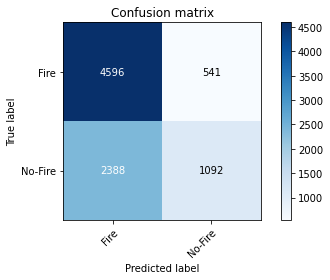

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np


# define your class labels
class_names = ['Fire', 'No-Fire']

# create confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# plot confusion matrix with labels
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=class_names, yticklabels=class_names,
       title='Confusion matrix',
       ylabel='True label',
       xlabel='Predicted label')

# rotate x-axis labels
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# add text labels to each cell
fmt = 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

fig.tight_layout()
plt.show()

In [ ]:

# Define the model architecture
modelmv2 = torch.hub.load('pytorch/vision:v0.9.0', 'mobilenet_v2', pretrained=True)

for param in modelmv2.parameters():
    param.requires_grad = False

n_features = modelmv2.classifier[1].in_features
modelmv2.classifier[1] = nn.Linear(n_features, 2)



# Define the loss function, optimizer, and learning rate scheduler
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(modelmv2.classifier[1].parameters(), lr=0.001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

# Train the model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
modelmv2.to(device)

num_epochs = 20

for epoch in range(num_epochs):
    # Train the model for one epoch
    modelmv2.train()
    running_loss = 0.0
    correct = 0
    total = 0
    true_labels = []
    predicted_labels = []

    for batch_idx, (data, labels) in enumerate(train_loader):
        data = data.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = modelmv2(data)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_acc = 100. * correct / total

    # Validate the model
    modelmv2.eval()
    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for batch_idx, (data, labels) in enumerate(val_loader):
            data = data.to(device)
            labels = labels.to(device)

            outputs = modelmv2(data)
            loss = criterion(outputs, labels)

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
            # Append to the lists
            true_labels += labels.cpu().numpy().tolist()
            predicted_labels += predicted.cpu().numpy().tolist()

    val_loss = running_loss / len(val_loader)
    val_acc = 100. * correct / total
    print(f'Epoch {epoch+1}/{num_epochs},' f'Train Loss: {train_loss:.3f},' f'Train Acc: {train_acc:.2f}%' f'Val Loss: {val_loss:.3f},' f'Val Acc: {val_acc}')

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.9.0


Epoch 1/20,Train Loss: 0.068,Train Acc: 97.52%Val Loss: 0.940,Val Acc: 64.47719623999072
Epoch 2/20,Train Loss: 0.037,Train Acc: 98.80%Val Loss: 1.200,Val Acc: 66.15991644423814
Epoch 3/20,Train Loss: 0.031,Train Acc: 98.88%Val Loss: 1.060,Val Acc: 64.48880120691656
Epoch 4/20,Train Loss: 0.027,Train Acc: 99.00%Val Loss: 1.402,Val Acc: 66.09028664268307
Epoch 5/20,Train Loss: 0.030,Train Acc: 98.95%Val Loss: 1.223,Val Acc: 64.51201114076825
Epoch 6/20,Train Loss: 0.028,Train Acc: 98.97%Val Loss: 1.229,Val Acc: 65.71892770105605
Epoch 7/20,Train Loss: 0.030,Train Acc: 98.89%Val Loss: 1.456,Val Acc: 65.69571776720436
Epoch 8/20,Train Loss: 0.029,Train Acc: 98.95%Val Loss: 1.278,Val Acc: 66.38041081582918
Epoch 9/20,Train Loss: 0.027,Train Acc: 99.06%Val Loss: 1.468,Val Acc: 66.1251015434606
Epoch 10/20,Train Loss: 0.028,Train Acc: 99.01%Val Loss: 1.277,Val Acc: 67.16954856678659
Epoch 11/20,Train Loss: 0.029,Train Acc: 99.02%Val Loss: 1.306,Val Acc: 66.97226412904723
Epoch 12/20,Train Lo

In [ ]:

# Print the summary of the model
summary(model, input_size=(3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

In [ ]:
# define your class labels
class_names = ['Fire', 'No-Fire']

# generate classification report
report = classification_report(true_labels, predicted_labels, target_names=class_names)

print(report)

              precision    recall  f1-score   support

        Fire       0.67      0.80      0.73      5137
     No-Fire       0.59      0.42      0.49      3480

    accuracy                           0.65      8617
   macro avg       0.63      0.61      0.61      8617
weighted avg       0.64      0.65      0.63      8617



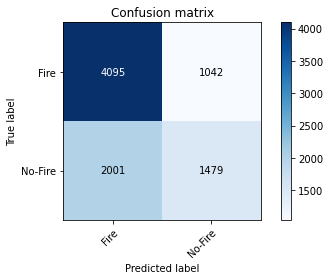

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np


# define your class labels
class_names = ['Fire', 'No-Fire']

# create confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# plot confusion matrix with labels
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=class_names, yticklabels=class_names,
       title='Confusion matrix',
       ylabel='True label',
       xlabel='Predicted label')

# rotate x-axis labels
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# add text labels to each cell
fmt = 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

fig.tight_layout()
plt.show()

mobilenetv2+cnn

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms, datasets

# Define the transforms to apply to the images
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(degrees=20),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Load the Flame dataset
train_dataset = datasets.ImageFolder(root='/content/Training', transform=train_transform)
test_dataset = datasets.ImageFolder(root='/content/Test', transform=test_transform)

# Create data loaders for the datasets
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define the MobileNetV2 + CNN model
class FireDetectionModel(nn.Module):
    def __init__(self):
        super(FireDetectionModel, self).__init__()
        self.mobilenet = models.mobilenet_v2(pretrained=True)
        self.cnn = nn.Sequential(
            nn.Conv2d(1280, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Conv2d(256, 2, kernel_size=1),
            nn.AdaptiveAvgPool2d(1)
        )

    def forward(self, x):
        features = self.mobilenet.features(x)
        out = self.cnn(features)
        out = out.view(out.size(0), -1)
        return out

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Create the model and optimizer
modelmv2_cnn = FireDetectionModel()
modelmv2_cnn.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(modelmv2_cnn.parameters(), lr=0.001)

# Train the model
num_epochs = 20

for epoch in range(num_epochs):
    modelmv2_cnn.train()
    for i, (images, labels) in enumerate(train_loader):
        # Move the images and labels to the GPU if available
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass and calculate loss
        outputs = modelmv2_cnn(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Evaluate the model on the test set
    modelmv2_cnn.eval()
    with torch.no_grad():
        total = 0
        correct = 0
        true_labels = []
        predicted_labels = []

        for images, labels in test_loader:
            # Move the images and labels to the GPU if available
            images = images.to(device)
            labels = labels.to(device)

            outputs = modelmv2_cnn(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            true_labels += labels.cpu().numpy().tolist()
            predicted_labels += predicted.cpu().numpy().tolist()

        accuracy = correct / total
        val_acc = 100.0 * correct / total
        #print(f"Epoch {epoch+1}, Test Accuracy: {accuracy:.2f}")
        # Print epoch statistics
        print(f"Epoch [{epoch+1}/{num_epochs}], "
          f"Train Loss: {loss:.4f}, "
          f"Val Acc: {val_acc:.2f}%")

    # Save the model checkpoint if the test accuracy is greater than 95%
    if accuracy > 0.95:
        torch.save(modelmv2_cnn.state_dict(), f"fire_model_epoch{epoch+1}.ckpt")


/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth


  0%|          | 0.00/13.6M [00:00<?, ?B/s]

Epoch [1/20], Train Loss: 0.0005, Val Acc: 84.18%
Epoch [2/20], Train Loss: 0.3238, Val Acc: 68.74%
Epoch [3/20], Train Loss: 0.1341, Val Acc: 62.91%
Epoch [4/20], Train Loss: 0.0045, Val Acc: 72.88%
Epoch [5/20], Train Loss: 0.0219, Val Acc: 78.98%
Epoch [6/20], Train Loss: 0.0008, Val Acc: 78.73%
Epoch [7/20], Train Loss: 0.0261, Val Acc: 75.28%
Epoch [8/20], Train Loss: 0.0039, Val Acc: 77.61%
Epoch [9/20], Train Loss: 0.0000, Val Acc: 77.30%
Epoch [10/20], Train Loss: 0.0047, Val Acc: 63.13%
Epoch [11/20], Train Loss: 0.0110, Val Acc: 72.86%
Epoch [12/20], Train Loss: 0.0012, Val Acc: 77.59%
Epoch [13/20], Train Loss: 0.0036, Val Acc: 67.45%
Epoch [14/20], Train Loss: 0.0021, Val Acc: 76.47%
Epoch [15/20], Train Loss: 0.0005, Val Acc: 70.31%
Epoch [16/20], Train Loss: 0.0001, Val Acc: 69.87%
Epoch [17/20], Train Loss: 0.0008, Val Acc: 69.33%
Epoch [18/20], Train Loss: 0.1671, Val Acc: 78.98%
Epoch [19/20], Train Loss: 0.0005, Val Acc: 78.79%
Epoch [20/20], Train Loss: 0.0000, Val A

In [ ]:
# define your class labels
class_names = ['Fire', 'No-Fire']

# generate classification report
report = classification_report(true_labels, predicted_labels, target_names=class_names)

print(report)

              precision    recall  f1-score   support

        Fire       0.72      0.96      0.83      5137
     No-Fire       0.89      0.46      0.60      3480

    accuracy                           0.76      8617
   macro avg       0.81      0.71      0.71      8617
weighted avg       0.79      0.76      0.74      8617



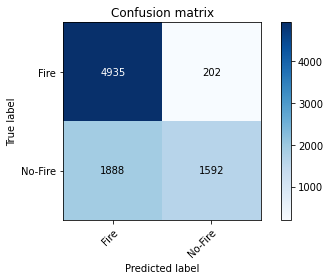

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np


# define your class labels
class_names = ['Fire', 'No-Fire']

# create confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# plot confusion matrix with labels
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=class_names, yticklabels=class_names,
       title='Confusion matrix',
       ylabel='True label',
       xlabel='Predicted label')

# rotate x-axis labels
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# add text labels to each cell
fmt = 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

fig.tight_layout()
plt.show()

In [ ]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms, datasets

# Check if CUDA is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

# Define the transform to normalize the data
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the Flame dataset using PyTorch's ImageFolder class
train_dataset = datasets.ImageFolder(root='/content/Training', transform=transform)
val_dataset = datasets.ImageFolder(root='/content/Test', transform=transform)

# Define the data loaders for training and validation sets
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Define the CNN model
class FireCNN(nn.Module):
    def __init__(self):
        super(FireCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(128 * 28 * 28, 512)
        self.fc2 = nn.Linear(512, 2)

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = self.pool(nn.functional.relu(self.conv3(x)))
        x = x.view(-1, 128 * 28 * 28)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x



# Initialize the model and move it to the device
model = FireCNN().to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 20
for epoch in range(num_epochs):
    # Set the model to training mode
    model.train()
    
    # Loop over the training data
    for i, (images, labels) in enumerate(train_loader):
        # Move the data to the device
        images = images.to(device)
        labels = labels.to(device)
        
        # Zero the gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
    # Set the model to evaluation mode
    model.eval()
    
    # Compute the accuracy on the validation data
    correct = 0
    total = 0
    true_labels = []
    predicted_labels = []
    with torch.no_grad():
        for images, labels in val_loader:
            # Move the data to the device
            images = images.to(device)
            labels = labels.to(device)
            
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            # Append to the lists
            true_labels += labels.cpu().numpy().tolist()
            predicted_labels += predicted.cpu().numpy().tolist()
  # Print the loss and accuracy for this epoch
    print('Epoch [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}'.format(epoch + 1, num_epochs, loss.item(), 100 * correct / total))

Using device: cuda
Epoch [1/20], Loss: 0.0001, Accuracy: 54.89
Epoch [2/20], Loss: 0.0000, Accuracy: 54.90
Epoch [3/20], Loss: 0.0005, Accuracy: 52.03
Epoch [4/20], Loss: 0.0002, Accuracy: 54.75
Epoch [5/20], Loss: 0.0000, Accuracy: 56.04
Epoch [6/20], Loss: 0.0000, Accuracy: 55.56
Epoch [7/20], Loss: 0.0000, Accuracy: 53.28
Epoch [8/20], Loss: 0.0000, Accuracy: 53.95
Epoch [9/20], Loss: 0.0000, Accuracy: 52.83
Epoch [10/20], Loss: 0.0000, Accuracy: 55.44
Epoch [11/20], Loss: 0.0000, Accuracy: 51.83
Epoch [12/20], Loss: 0.0000, Accuracy: 51.27
Epoch [13/20], Loss: 0.0000, Accuracy: 50.33
Epoch [14/20], Loss: 0.0000, Accuracy: 55.65
Epoch [15/20], Loss: 0.0000, Accuracy: 53.85
Epoch [16/20], Loss: 0.0000, Accuracy: 53.24
Epoch [17/20], Loss: 0.0000, Accuracy: 53.22
Epoch [18/20], Loss: 0.0000, Accuracy: 54.16
Epoch [19/20], Loss: 0.0000, Accuracy: 56.90
Epoch [20/20], Loss: 0.0000, Accuracy: 53.97


In [ ]:
from torchsummary import summary
# Create an instance of the model

model = FireCNN().to(device)
# Print the summary of the model
summary(model, input_size=(3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 224, 224]             896
         MaxPool2d-2         [-1, 32, 112, 112]               0
            Conv2d-3         [-1, 64, 112, 112]          18,496
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5          [-1, 128, 56, 56]          73,856
         MaxPool2d-6          [-1, 128, 28, 28]               0
            Linear-7                  [-1, 512]      51,380,736
            Linear-8                    [-1, 2]           1,026
Total params: 51,475,010
Trainable params: 51,475,010
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.57
Forward/backward pass size (MB): 26.80
Params size (MB): 196.36
Estimated Total Size (MB): 223.74
----------------------------------------------------------------


In [ ]:
from sklearn.metrics import classification_report

# define your class labels
class_names = ['Fire', 'No-Fire']

# generate classification report
report = classification_report(true_labels, predicted_labels)

print(report)

              precision    recall  f1-score   support

           0       0.58      0.85      0.69      5137
           1       0.27      0.08      0.13      3480

    accuracy                           0.54      8617
   macro avg       0.42      0.47      0.41      8617
weighted avg       0.45      0.54      0.46      8617



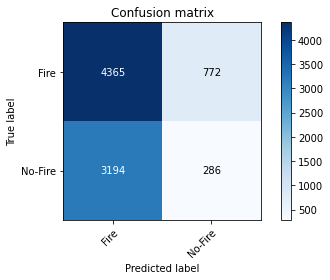

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np


# define your class labels
class_names = ['Fire', 'No-Fire']

# create confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# plot confusion matrix with labels
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=class_names, yticklabels=class_names,
       title='Confusion matrix',
       ylabel='True label',
       xlabel='Predicted label')

# rotate x-axis labels
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# add text labels to each cell
fmt = 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

fig.tight_layout()
plt.show()

In [ ]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms, datasets

# Check if CUDA is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

# Define the transform to normalize the data
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the Flame dataset using PyTorch's ImageFolder class
train_dataset = datasets.ImageFolder(root='/content/Training', transform=transform)
val_dataset = datasets.ImageFolder(root='/content/Test', transform=transform)

# Define the data loaders for training and validation sets
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Define the CNN model architecture
class FlameCNN(nn.Module):
    def __init__(self):
        super(FlameCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(128 * 28 * 28, 512)
        self.relu4 = nn.ReLU()
        self.fc2 = nn.Linear(512, 2)
        self.softmax = nn.Softmax(dim=1)
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        x = self.conv3(x)
        x = self.relu3(x)
        x = self.pool3(x)
        x = x.view(-1, 128 * 28 * 28)
        x = self.fc1(x)
        x = self.relu4(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x



# Initialize the model and move it to the device
model = FlameCNN().to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 20
for epoch in range(num_epochs):
    # Set the model to training mode
    model.train()
    
    # Loop over the training data
    for i, (images, labels) in enumerate(train_loader):
        # Move the data to the device
        images = images.to(device)
        labels = labels.to(device)
        
        # Zero the gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
    # Set the model to evaluation mode
    model.eval()
    
    # Compute the accuracy on the validation data
    correct = 0
    total = 0
    true_labels = []
    predicted_labels = []
    with torch.no_grad():
        for images, labels in val_loader:
            # Move the data to the device
            images = images.to(device)
            labels = labels.to(device)
            
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            # Append to the lists
            true_labels += labels.cpu().numpy().tolist()
            predicted_labels += predicted.cpu().numpy().tolist()
  # Print the loss and accuracy for this epoch
    print('Epoch [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}'.format(epoch + 1, num_epochs, loss.item(), 100 * correct / total))

Using device: cuda
Epoch [1/20], Loss: 0.9133, Accuracy: 59.61
Epoch [2/20], Loss: 0.5799, Accuracy: 59.61
Epoch [3/20], Loss: 0.5799, Accuracy: 59.61
Epoch [4/20], Loss: 0.8466, Accuracy: 59.61
Epoch [5/20], Loss: 0.6466, Accuracy: 59.61
Epoch [6/20], Loss: 0.4466, Accuracy: 59.61
Epoch [7/20], Loss: 0.7133, Accuracy: 59.61
Epoch [8/20], Loss: 0.7133, Accuracy: 59.61
Epoch [9/20], Loss: 0.6466, Accuracy: 59.61
Epoch [10/20], Loss: 0.7133, Accuracy: 59.61
Epoch [11/20], Loss: 0.8466, Accuracy: 59.61
Epoch [12/20], Loss: 0.5799, Accuracy: 59.61
Epoch [13/20], Loss: 0.6466, Accuracy: 59.61
Epoch [14/20], Loss: 0.7133, Accuracy: 59.61
Epoch [15/20], Loss: 0.5133, Accuracy: 59.61
Epoch [16/20], Loss: 0.7133, Accuracy: 59.61
Epoch [17/20], Loss: 0.7133, Accuracy: 59.61
Epoch [18/20], Loss: 0.6466, Accuracy: 59.61
Epoch [19/20], Loss: 0.8466, Accuracy: 59.61
Epoch [20/20], Loss: 0.9133, Accuracy: 59.61


In [ ]:
from torchsummary import summary
# Create an instance of the model

model = FlameCNN().to(device)
# Print the summary of the model
summary(model, input_size=(3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 224, 224]             896
              ReLU-2         [-1, 32, 224, 224]               0
         MaxPool2d-3         [-1, 32, 112, 112]               0
            Conv2d-4         [-1, 64, 112, 112]          18,496
              ReLU-5         [-1, 64, 112, 112]               0
         MaxPool2d-6           [-1, 64, 56, 56]               0
            Conv2d-7          [-1, 128, 56, 56]          73,856
              ReLU-8          [-1, 128, 56, 56]               0
         MaxPool2d-9          [-1, 128, 28, 28]               0
           Linear-10                  [-1, 512]      51,380,736
             ReLU-11                  [-1, 512]               0
           Linear-12                    [-1, 2]           1,026
          Softmax-13                    [-1, 2]               0
Total params: 51,475,010
Trainable para

In [ ]:
from sklearn.metrics import classification_report

# define your class labels
class_names = ['Fire', 'No-Fire']

# generate classification report
report = classification_report(true_labels, predicted_labels)

print(report)

              precision    recall  f1-score   support

           0       0.60      1.00      0.75      5137
           1       0.00      0.00      0.00      3480

    accuracy                           0.60      8617
   macro avg       0.30      0.50      0.37      8617
weighted avg       0.36      0.60      0.45      8617



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


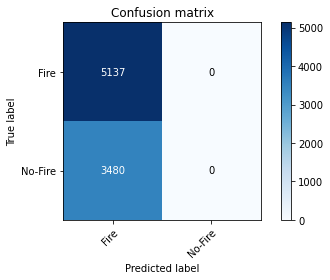

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np


# define your class labels
class_names = ['Fire', 'No-Fire']

# create confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# plot confusion matrix with labels
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=class_names, yticklabels=class_names,
       title='Confusion matrix',
       ylabel='True label',
       xlabel='Predicted label')

# rotate x-axis labels
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# add text labels to each cell
fmt = 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

fig.tight_layout()
plt.show()

In [ ]:
from torchvision import models, transforms, datasets
# Load pre-trained model
import torch.nn as nn
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms, datasets


# Define the transforms to apply to the images
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(degrees=20),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Load the Flame dataset
train_dataset = datasets.ImageFolder(root='/content/Training', transform=train_transform)
test_dataset = datasets.ImageFolder(root='/content/Test', transform=test_transform)

# Create data loaders for the datasets
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)


model = models.densenet169(pretrained=True)
num_ftrs = model.classifier.in_features
model.fc = nn.Linear(num_ftrs, 2)  # replace last layer

# Freeze all layers except the last one
for param in model.parameters():
    param.requires_grad = True


# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)


# Check if CUDA is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

# Train the model
model.to(device)
num_epochs = 20
for epoch in range(num_epochs):
    # Train the model
    model.train()
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    epoch_loss = running_loss / len(train_loader)

    # Evaluate the model
    model.eval()
    num_correct = 0
    num_total = 0
    true_labels = []
    predicted_labels = []
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            num_total += labels.size(0)
            num_correct += (predicted == labels).sum().item()
            # Append to the lists
            true_labels += labels.cpu().numpy().tolist()
            predicted_labels += predicted.cpu().numpy().tolist()
    val_acc = 100.0 * num_correct / num_total

    # Print epoch statistics
    print(f"Epoch [{epoch+1}/{num_epochs}], "
          f"Train Loss: {epoch_loss:.4f}, "
          f"Val Acc: {val_acc:.2f}%")

Using device: cpu


In [ ]:
from torchsummary import summary
# Create an instance of the model

model = model.to(device)
# Print the summary of the model
summary(model, input_size=(3, 224, 224))

In [ ]:
from sklearn.metrics import classification_report

# define your class labels
class_names = ['Fire', 'No-Fire']

# generate classification report
report = classification_report(true_labels, predicted_labels)

print(report)

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np


# define your class labels
class_names = ['Fire', 'No-Fire']

# create confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# plot confusion matrix with labels
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=class_names, yticklabels=class_names,
       title='Confusion matrix',
       ylabel='True label',
       xlabel='Predicted label')

# rotate x-axis labels
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# add text labels to each cell
fmt = 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

fig.tight_layout()
plt.show()

In [ ]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms, datasets

# Check if CUDA is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

# Define the transform to normalize the data
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the Flame dataset using PyTorch's ImageFolder class
train_dataset = datasets.ImageFolder(root='/content/Training', transform=transform)
val_dataset = datasets.ImageFolder(root='/content/Test', transform=transform)

# Define the data loaders for training and validation sets
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

class FireNet(nn.Module):
    def __init__(self, input_shape, num_classes):
        super(FireNet, self).__init__()

        self.num_classes = num_classes

        self.conv_block1 = nn.Sequential(
            nn.Conv2d(input_shape[0], 8, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(8),
            nn.ReLU(),
        )

        self.sep_conv_blocks = nn.ModuleList()
        prev_channels = 8
        for channels in [8]:
            self.sep_conv_blocks.append(nn.Sequential(
                nn.ReLU(),
                nn.Conv2d(prev_channels, channels, kernel_size=3, stride=1, padding=1, groups=prev_channels),
                nn.BatchNorm2d(channels),
                nn.ReLU(),
                nn.Conv2d(channels, channels, kernel_size=1, stride=1, padding=0),
                nn.BatchNorm2d(channels),
                nn.MaxPool2d(kernel_size=3, stride=2, padding=1),
            ))
            prev_channels = channels

        self.final_conv_block = nn.Sequential(
            nn.Conv2d(prev_channels, 8, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(8),
            nn.ReLU(),
        )

        self.global_avg_pool = nn.AdaptiveAvgPool2d(output_size=(1, 1))

        self.classifier = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(8, self.num_classes),
            nn.Sigmoid() if self.num_classes == 1 else nn.Softmax(dim=1),
        )

    def forward(self, x):
        x = self.conv_block1(x)

        for sep_conv_block in self.sep_conv_blocks:
            residual = x
            x = sep_conv_block(x)
            residual = nn.Conv2d(residual.size(1), x.size(1), kernel_size=1, stride=2)(residual)
            x = x + residual

        x = self.final_conv_block(x)

        x = self.global_avg_pool(x)

        x = torch.flatten(x, 1)

        x = self.classifier(x)

        return x

# Initialize the model and move it to the device
model = FireNet((3,224),2).to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 20
for epoch in range(num_epochs):
    # Set the model to training mode
    model.train()
    
    # Loop over the training data
    for i, (images, labels) in enumerate(train_loader):
        # Move the data to the device
        images = images.to(device)
        labels = labels.to(device)
        
        # Zero the gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
    # Set the model to evaluation mode
    model.eval()
    
    # Compute the accuracy on the validation data
    correct = 0
    total = 0
    true_labels = []
    predicted_labels = []
    with torch.no_grad():
        for images, labels in val_loader:
            # Move the data to the device
            images = images.to(device)
            labels = labels.to(device)
            
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            # Append to the lists
            true_labels += labels.cpu().numpy().tolist()
            predicted_labels += predicted.cpu().numpy().tolist()
  # Print the loss and accuracy for this epoch
    print('Epoch [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}'.format(epoch + 1, num_epochs, loss.item(), 100 * correct / total))

Using device: cpu
Epoch [1/20], Loss: 0.3647, Accuracy: 62.70
Epoch [2/20], Loss: 0.3971, Accuracy: 59.77
Epoch [3/20], Loss: 0.3772, Accuracy: 66.23
Epoch [4/20], Loss: 0.3748, Accuracy: 57.21
Epoch [5/20], Loss: 0.3906, Accuracy: 63.34
Epoch [6/20], Loss: 0.3250, Accuracy: 63.12
Epoch [7/20], Loss: 0.4291, Accuracy: 63.33
Epoch [8/20], Loss: 0.4300, Accuracy: 68.06
Epoch [9/20], Loss: 0.3841, Accuracy: 63.91
Epoch [10/20], Loss: 0.3900, Accuracy: 65.15
Epoch [11/20], Loss: 0.3555, Accuracy: 67.07
Epoch [12/20], Loss: 0.3693, Accuracy: 66.33
Epoch [13/20], Loss: 0.3720, Accuracy: 63.93
Epoch [14/20], Loss: 0.4329, Accuracy: 62.70
Epoch [15/20], Loss: 0.4716, Accuracy: 69.28
Epoch [16/20], Loss: 0.4359, Accuracy: 71.41
Epoch [17/20], Loss: 0.3166, Accuracy: 66.62
Epoch [18/20], Loss: 0.3291, Accuracy: 71.79
Epoch [19/20], Loss: 0.3293, Accuracy: 71.56
Epoch [20/20], Loss: 0.5372, Accuracy: 71.85


In [ ]:
from torchsummary import summary
# Create an instance of the model

model =FireNet.to(device)
# Print the summary of the model
summary(model, input_size=(3, 224, 224))

In [ ]:
from sklearn.metrics import classification_report

# define your class labels
class_names = ['Fire', 'No-Fire']

# generate classification report
report = classification_report(true_labels, predicted_labels)

print(report)

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np


# define your class labels
class_names = ['Fire', 'No-Fire']

# create confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# plot confusion matrix with labels
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=class_names, yticklabels=class_names,
       title='Confusion matrix',
       ylabel='True label',
       xlabel='Predicted label')

# rotate x-axis labels
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# add text labels to each cell
fmt = 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

fig.tight_layout()
plt.show()